[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(0, 1), (0, 10), (0, 2), (0, 9), (1, 2), (1, 3), (1, 10), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 8), (6, 7), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10)]
  (0, 1)	1
  (0, 2)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 10)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (7, 5)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  (8, 10)	1
  (9, 0)	1
  (9, 7)	1
  (9, 8)	1
  (9, 10)	1
  (10, 0)	1
  (10, 1)	1
  (10, 8)	1
  (10, 9)	1


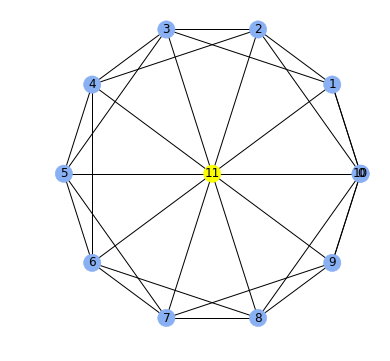

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

n = 11  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

g = nx.Graph(adj)
print(g.nodes())
print(g.edges())
print(nx.adjacency_matrix(g))

g.add_node(n, color='#fcff00')
# We add an edge from every existing
# node to the new node.
for i in range(n):
    g.add_edge(i, n)

# We define custom node positions on a circle
# except the last node which is at the center.
t = np.linspace(0., 2 * np.pi, n)
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)
pos[:n, 1] = np.sin(t)

# A node's color is specified by its 'color'
# attribute, or a default color if this attribute
# doesn't exist.
color = [g.node[i].get('color', '#88b0f3')
         for i in range(n + 1)]

# We now draw the graph with matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, pos=pos, node_color=color, ax=ax)
ax.set_axis_off()

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
type(tips)

pandas.core.frame.DataFrame

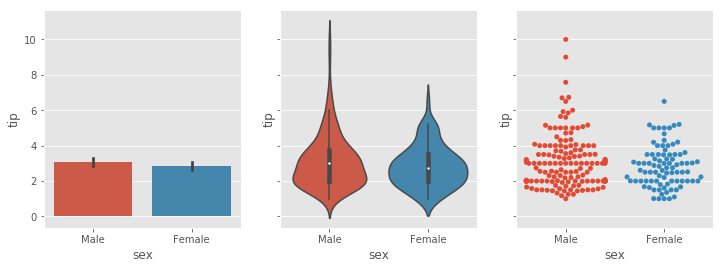

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 4), sharey=True)
sns.barplot(x='sex', y='tip', data=tips, ax=ax1)
sns.violinplot(x='sex', y='tip', data=tips, ax=ax2)
sns.swarmplot(x='sex', y='tip', data=tips, ax=ax3)


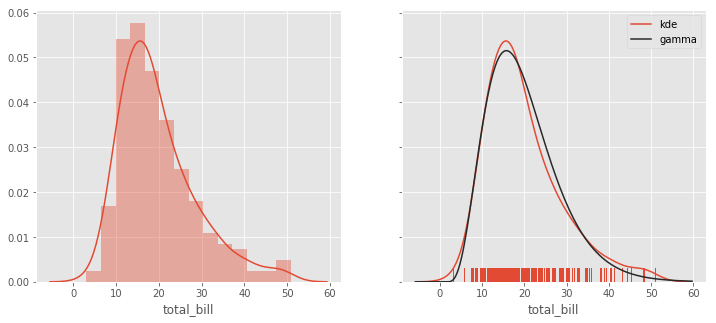

In [18]:
plt.style.use('ggplot')
# We create two subplots sharing the same y axis.
f, (ax1, ax2) = plt.subplots(1, 2,
                             figsize=(12, 5),
                             sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(tips.total_bill,
             ax=ax1,
             hist=True)

# Right subplot.
# "Rugplot", KDE, and gamma fit.
sns.distplot(tips.total_bill,
             ax=ax2,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws=dict(label='gamma'),
             kde_kws=dict(label='kde'))
ax2.legend()
